In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import requests
import bs4 as bs
import urllib.request
from functools import wraps

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from timple.timedelta import strftimedelta
from fastf1.core import Laps

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
plotting.setup_mpl()

In [412]:
ff1.Cache.enable_cache('/Users/allanwaweru/Downloads/cache')


In [413]:
source = urllib.request.urlopen('https://www.formula1.com/en/results.html/2021/drivers.html').read()
soup = bs.BeautifulSoup(source,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table), flavor='bs4', header=[0])[0]
df.drop(["Unnamed: 0","Unnamed: 6"],axis=1, inplace=True)
df.set_index('Pos',inplace=True)
df.head()

,Driver,Nationality,Car,PTS
Pos,,,,
1,Max Verstappen VER,NED,Red Bull Racing Honda,395.5
2,Lewis Hamilton HAM,GBR,Mercedes,387.5
3,Valtteri Bottas BOT,FIN,Mercedes,226.0
4,Sergio Perez PER,MEX,Red Bull Racing Honda,190.0
5,Carlos Sainz SAI,ESP,Ferrari,164.5


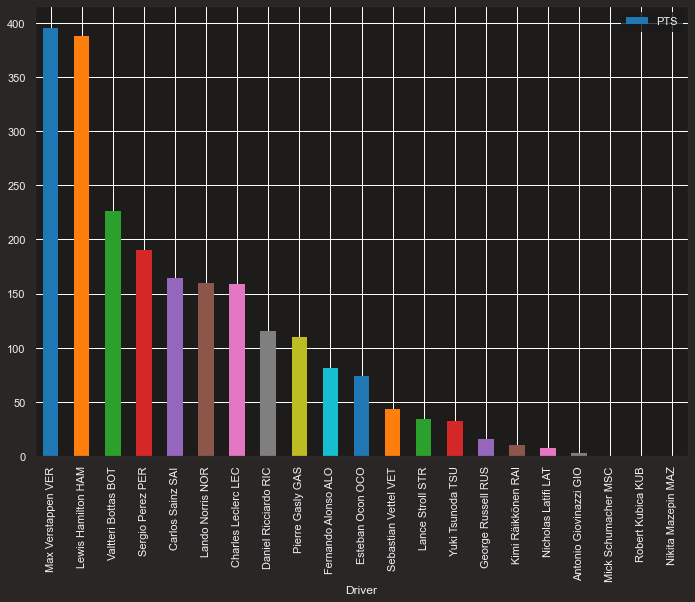

In [414]:
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
df.plot.bar(x="Driver", y="PTS",color=colors);



plt.show()

In [436]:

def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [463]:
rounds = 22

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'current/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        # Store the drivers' position
        current_round[driver] = int(position)
        
        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')

In [464]:
all_championship_standings

,HAM,VER,BOT,NOR,PER,LEC,RIC,SAI,TSU,STR,...,GIO,OCO,RUS,VET,MSC,GAS,LAT,ALO,MAZ,KUB
round,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,NaN
2.0,1.0,2.0,5.0,3.0,8.0,4.0,7.0,6.0,11.0,10.0,...,15.0,12.0,16.0,17.0,18.0,9.0,20.0,13.0,19.0,NaN
3.0,1.0,2.0,4.0,3.0,6.0,5.0,7.0,8.0,13.0,11.0,...,15.0,9.0,17.0,16.0,18.0,10.0,20.0,12.0,19.0,NaN
4.0,1.0,2.0,3.0,4.0,6.0,5.0,7.0,8.0,13.0,11.0,...,15.0,9.0,17.0,16.0,18.0,10.0,19.0,12.0,20.0,NaN
5.0,2.0,1.0,4.0,3.0,5.0,6.0,8.0,7.0,14.0,12.0,...,15.0,10.0,17.0,11.0,19.0,9.0,18.0,13.0,20.0,NaN
6.0,2.0,1.0,6.0,4.0,3.0,5.0,10.0,7.0,14.0,13.0,...,16.0,12.0,18.0,9.0,17.0,8.0,20.0,11.0,19.0,NaN
7.0,2.0,1.0,5.0,4.0,3.0,6.0,9.0,7.0,14.0,13.0,...,16.0,12.0,17.0,10.0,18.0,8.0,20.0,11.0,19.0,NaN
8.0,2.0,1.0,5.0,4.0,3.0,6.0,9.0,7.0,14.0,12.0,...,16.0,13.0,17.0,10.0,18.0,8.0,20.0,11.0,19.0,NaN
9.0,2.0,1.0,5.0,4.0,3.0,6.0,8.0,7.0,14.0,12.0,...,16.0,13.0,17.0,10.0,18.0,9.0,20.0,11.0,19.0,NaN


In [465]:
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])


In [466]:
all_championship_standings_melted

,round,variable,value
0,1.0,HAM,1.0
1,2.0,HAM,1.0
2,3.0,HAM,1.0
3,4.0,HAM,1.0
4,5.0,HAM,2.0
...,...,...,...
457,18.0,KUB,20.0
458,19.0,KUB,20.0
459,20.0,KUB,20.0
460,21.0,KUB,20.0


KeyError: 0

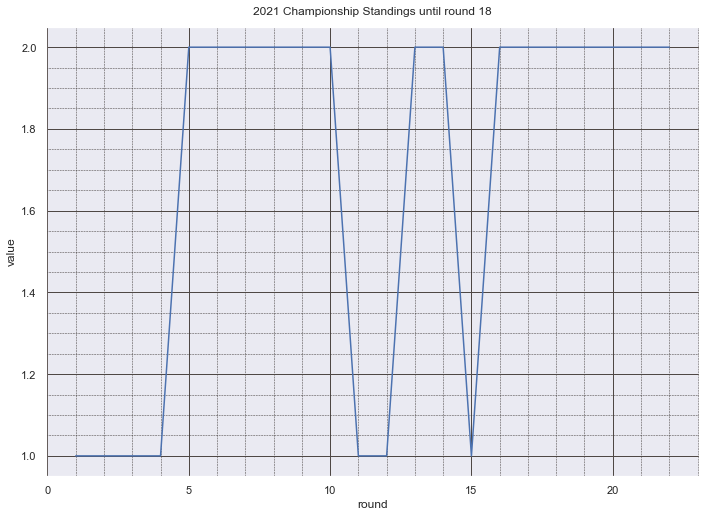

In [461]:
plotting.setup_mpl()

# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2021 Championship Standings until round 18")

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver])

# Invert Y-axis to have championship leader (#1) on top
#ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines

plt.show()

In [376]:
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)
quali = ff1.get_session(2021, 'Yas Marina', 'Q')
laps = quali.load_laps()

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '77', '11', '4', '22', '10', '55', '3', '16', '18', '31', '7', '99', '14', '5', '63', '6', '47', '9']


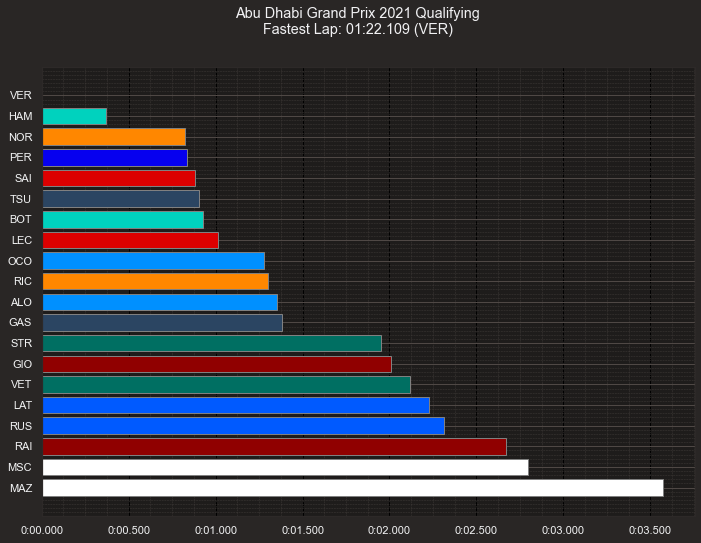

In [377]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

#create a list of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)
    
#Plotting all the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{quali.weekend.name} {quali.weekend.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 19 drivers: ['31', '6', '63', '14', '4', '3', '7', '11', '5', '22', '16', '77', '44', '99', '47', '55', '33', '10', '18']


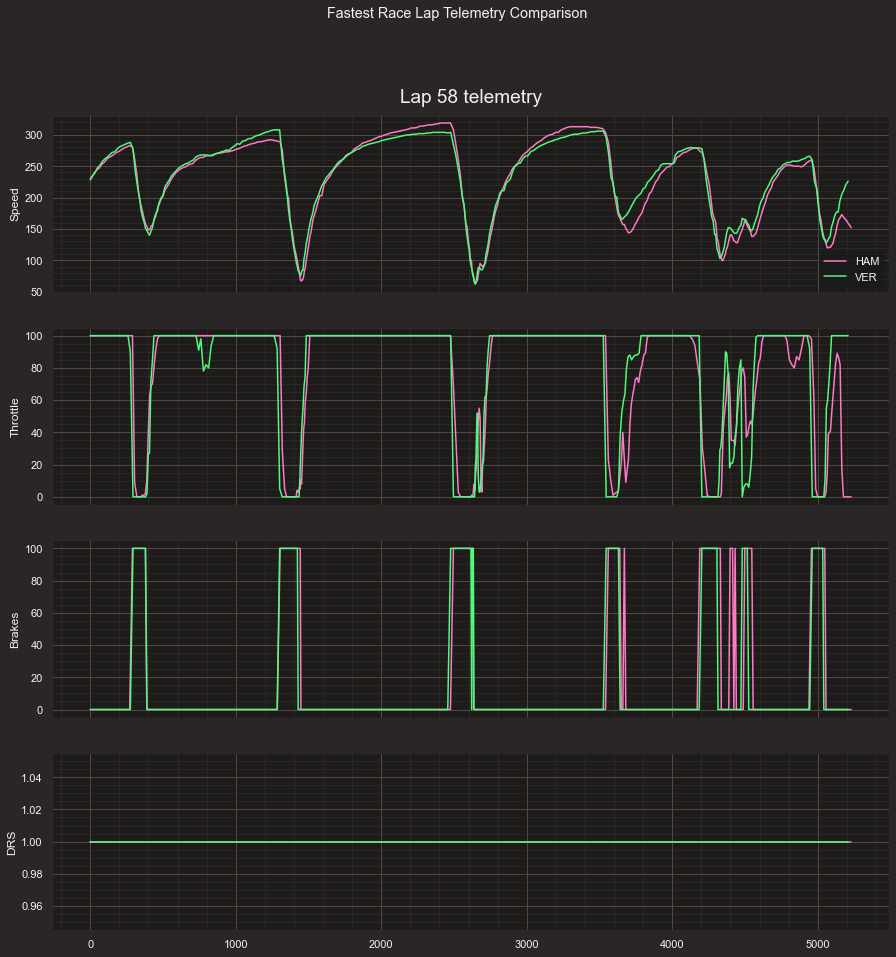

In [402]:
race = ff1.get_session(2021, 'Abu Dhabi', 'R')
laps = race.load_laps(with_telemetry=True)
laps_ham = laps.pick_driver('HAM')
laps_ver = laps.pick_driver('VER')
pd.options.mode.chained_assignment = None
laps_ham['RaceLapNumber'] = laps_ham['LapNumber'] 
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] 

lap_telemetry_ver = laps_ver.loc[laps_ver['RaceLapNumber']==58].get_car_data().add_distance()
lap_telemetry_ham = laps_ham.loc[laps_ham['RaceLapNumber']==58].get_car_data().add_distance()



plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(4)
fig.suptitle("Fastest Race Lap Telemetry Comparison")


ax[0].title.set_text("Lap 58 telemetry")
ax[0].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Speed'], label='HAM')
ax[0].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Speed'], label='VER')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Throttle'], label='HAM')
ax[1].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Throttle'], label='VER')
ax[1].set(ylabel='Throttle')

ax[2].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Brake'], label='HAM')
ax[2].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Brake'], label='VER')
ax[2].set(ylabel='Brakes')

ax[3].plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['DRS'], label='HAM')
ax[3].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['DRS'], label='VER')
ax[3].set(ylabel='DRS')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [379]:
plotting.setup_mpl()



core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 19 drivers: ['33', '44', '4', '11', '55', '77', '16', '22', '31', '3', '14', '10', '18', '99', '5', '6', '63', '7', '47']


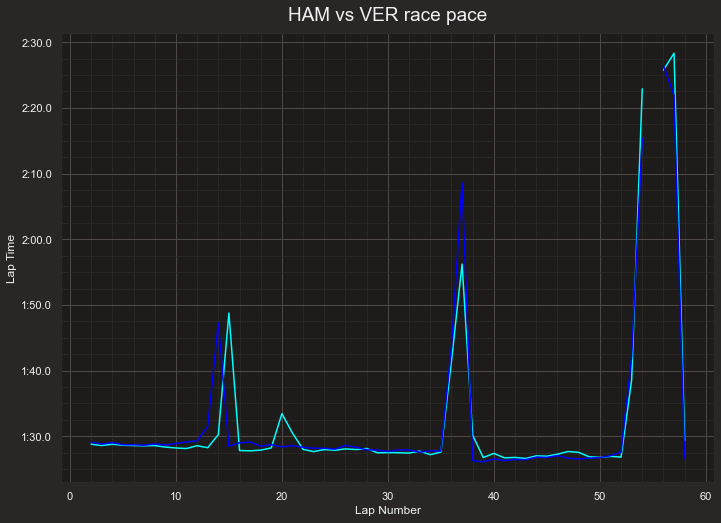

In [380]:
race = ff1.get_session(2021, 'Yas Marina', 'R')
laps = race.load_laps()

ver = laps.pick_driver('VER')
ham = laps.pick_driver('HAM')
fig, ax = plt.subplots()
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.plot(ver['LapNumber'], ver['LapTime'], color='blue')
ax.set_title("HAM vs VER race pace")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.show()